# Data Cleaning and Data Visualization of Netfix Dataset
---

In [2]:
import pandas as pd
import numpy as np
import openpyxl
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import random

## Data Cleaning

In [3]:
df = pd.read_csv("netflix_Dataset.csv")   # read csv file 
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
df.isnull().sum()             # No null Values

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
df['date_added']=pd.to_datetime(df['date_added'])  # convert date_added column into datetime format
df['year_added'] = df['date_added'].dt.year        # extract year from date_added
df


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,2018


In [6]:
df['duration']=df['duration'].astype(str)  # convert duration column to string
df['duration'] = df['duration'].str.extract(r'(\d+)').astype(float)    # Extract  number using regex
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1.0,"TV Dramas, TV Horror, TV Mysteries",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91.0,"Children & Family Movies, Comedies",2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies",2021
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2.0,"International TV Shows, TV Dramas",2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3.0,Kids' TV,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1.0,"International TV Shows, Romantic TV Shows, TV ...",2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1.0,Kids' TV,2018


In [7]:
detail = df.describe()
print(detail)
from tabulate import tabulate

stats = [
    ["Count", "Total number of entries"],
    ["Mean", "Average release year, duration, and year added"],
    ["Min", "Earliest added content, oldest release, shortest duration"],
    ["Max", "Latest added content, newest release, longest duration"],
    ["25%", "Content added before April 6, 2018, released before 2013, duration ≤ 2 min"],
    ["50% (Median)", "Added before July 3, 2019, released in 2017, median duration: 88.5 min"],
    ["75%", "Content added before Aug 19, 2020, released before 2019, duration ≤ 106 min"],
    ["Std", "Variation from the mean"],
]

print(tabulate(stats, headers=["Metric", "Description"], tablefmt="grid"))


                          date_added  release_year     duration   year_added
count                           8790   8790.000000  8790.000000  8790.000000
mean   2019-05-17 21:44:01.638225408   2014.183163    69.934471  2018.873606
min              2008-01-01 00:00:00   1925.000000     1.000000  2008.000000
25%              2018-04-06 00:00:00   2013.000000     2.000000  2018.000000
50%              2019-07-03 00:00:00   2017.000000    88.500000  2019.000000
75%              2020-08-19 18:00:00   2019.000000   106.000000  2020.000000
max              2021-09-25 00:00:00   2021.000000   312.000000  2021.000000
std                              NaN      8.825466    50.794433     1.573568
+--------------+-----------------------------------------------------------------------------+
| Metric       | Description                                                                 |
+==============+=============================================================================+
| Count        | Total

In [8]:
df.drop_duplicates(inplace=True)              # remove duplicates rows 
df                                            # there is no duplicate rows 

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90.0,Documentaries,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1.0,"Crime TV Shows, International TV Shows, TV Act...",2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1.0,"TV Dramas, TV Horror, TV Mysteries",2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91.0,"Children & Family Movies, Comedies",2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies",2021
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2.0,"International TV Shows, TV Dramas",2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3.0,Kids' TV,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1.0,"International TV Shows, Romantic TV Shows, TV ...",2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1.0,Kids' TV,2018


In [9]:
 # Lower case the column string for uniformaty and trim the whitespace 

df['title'] = df['title'].str.strip().str.lower()                  
df['director']= df['director'].str.strip().str.lower()
df['country']= df['country'].str.strip().str.lower()
df['listed_in']= df['listed_in'].str.strip().str.lower()
df['rating']= df['rating'].str.strip().str.upper()         # trim the white space and uppercase the rating column 
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added
0,s1,Movie,dick johnson is dead,kirsten johnson,united states,2021-09-25,2020,PG-13,90.0,documentaries,2021
1,s3,TV Show,ganglands,julien leclercq,france,2021-09-24,2021,TV-MA,1.0,"crime tv shows, international tv shows, tv act...",2021
2,s6,TV Show,midnight mass,mike flanagan,united states,2021-09-24,2021,TV-MA,1.0,"tv dramas, tv horror, tv mysteries",2021
3,s14,Movie,confessions of an invisible girl,bruno garotti,brazil,2021-09-22,2021,TV-PG,91.0,"children & family movies, comedies",2021
4,s8,Movie,sankofa,haile gerima,united states,2021-09-24,1993,TV-MA,125.0,"dramas, independent movies, international movies",2021
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,yunus emre,not given,turkey,2017-01-17,2016,TV-PG,2.0,"international tv shows, tv dramas",2017
8786,s8798,TV Show,zak storm,not given,united states,2018-09-13,2016,TV-Y7,3.0,kids' tv,2018
8787,s8801,TV Show,zindagi gulzar hai,not given,pakistan,2016-12-15,2012,TV-PG,1.0,"international tv shows, romantic tv shows, tv ...",2016
8788,s8784,TV Show,yoko,not given,pakistan,2018-06-23,2016,TV-Y,1.0,kids' tv,2018


In [10]:
# Create a column for content category

df['content_category'] = df['listed_in'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')
df


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,content_category
0,s1,Movie,dick johnson is dead,kirsten johnson,united states,2021-09-25,2020,PG-13,90.0,documentaries,2021,documentaries
1,s3,TV Show,ganglands,julien leclercq,france,2021-09-24,2021,TV-MA,1.0,"crime tv shows, international tv shows, tv act...",2021,crime tv shows
2,s6,TV Show,midnight mass,mike flanagan,united states,2021-09-24,2021,TV-MA,1.0,"tv dramas, tv horror, tv mysteries",2021,tv dramas
3,s14,Movie,confessions of an invisible girl,bruno garotti,brazil,2021-09-22,2021,TV-PG,91.0,"children & family movies, comedies",2021,children & family movies
4,s8,Movie,sankofa,haile gerima,united states,2021-09-24,1993,TV-MA,125.0,"dramas, independent movies, international movies",2021,dramas
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,yunus emre,not given,turkey,2017-01-17,2016,TV-PG,2.0,"international tv shows, tv dramas",2017,international tv shows
8786,s8798,TV Show,zak storm,not given,united states,2018-09-13,2016,TV-Y7,3.0,kids' tv,2018,kids' tv
8787,s8801,TV Show,zindagi gulzar hai,not given,pakistan,2016-12-15,2012,TV-PG,1.0,"international tv shows, romantic tv shows, tv ...",2016,international tv shows
8788,s8784,TV Show,yoko,not given,pakistan,2018-06-23,2016,TV-Y,1.0,kids' tv,2018,kids' tv


In [11]:
df.info()        # show information of data types and memory usage
df.head()        # show top 5 rows by default

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   country           8790 non-null   object        
 5   date_added        8790 non-null   datetime64[ns]
 6   release_year      8790 non-null   int64         
 7   rating            8790 non-null   object        
 8   duration          8790 non-null   float64       
 9   listed_in         8790 non-null   object        
 10  year_added        8790 non-null   int32         
 11  content_category  8790 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(8)
memory usage: 789.9+ KB


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,content_category
0,s1,Movie,dick johnson is dead,kirsten johnson,united states,2021-09-25,2020,PG-13,90.0,documentaries,2021,documentaries
1,s3,TV Show,ganglands,julien leclercq,france,2021-09-24,2021,TV-MA,1.0,"crime tv shows, international tv shows, tv act...",2021,crime tv shows
2,s6,TV Show,midnight mass,mike flanagan,united states,2021-09-24,2021,TV-MA,1.0,"tv dramas, tv horror, tv mysteries",2021,tv dramas
3,s14,Movie,confessions of an invisible girl,bruno garotti,brazil,2021-09-22,2021,TV-PG,91.0,"children & family movies, comedies",2021,children & family movies
4,s8,Movie,sankofa,haile gerima,united states,2021-09-24,1993,TV-MA,125.0,"dramas, independent movies, international movies",2021,dramas


In [12]:
#df.to_csv('Cleaned_Netflix.csv',index=False,sep='\t')
#df.to_markdown('Cleaned_Netflix.md', index=False)
#df.to_csv('Cleaned_Netflix.txt', index=False, sep='\t')

df.to_excel("Cleaned_Netflix.xlsx", index=False, engine='openpyxl')
print(tabulate(df.head(), headers='keys', tablefmt='psql')) 




+----+-----------+---------+----------------------------------+-----------------+---------------+---------------------+----------------+----------+------------+---------------------------------------------------------------+--------------+--------------------------+
|    | show_id   | type    | title                            | director        | country       | date_added          |   release_year | rating   |   duration | listed_in                                                     |   year_added | content_category         |
|----+-----------+---------+----------------------------------+-----------------+---------------+---------------------+----------------+----------+------------+---------------------------------------------------------------+--------------+--------------------------|
|  0 | s1        | Movie   | dick johnson is dead             | kirsten johnson | united states | 2021-09-25 00:00:00 |           2020 | PG-13    |         90 | documentaries                         

### Data Cleaning End ---
---

## Data Visualization

In [13]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,content_category
0,s1,Movie,dick johnson is dead,kirsten johnson,united states,2021-09-25,2020,PG-13,90.0,documentaries,2021,documentaries
1,s3,TV Show,ganglands,julien leclercq,france,2021-09-24,2021,TV-MA,1.0,"crime tv shows, international tv shows, tv act...",2021,crime tv shows
2,s6,TV Show,midnight mass,mike flanagan,united states,2021-09-24,2021,TV-MA,1.0,"tv dramas, tv horror, tv mysteries",2021,tv dramas
3,s14,Movie,confessions of an invisible girl,bruno garotti,brazil,2021-09-22,2021,TV-PG,91.0,"children & family movies, comedies",2021,children & family movies
4,s8,Movie,sankofa,haile gerima,united states,2021-09-24,1993,TV-MA,125.0,"dramas, independent movies, international movies",2021,dramas
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,yunus emre,not given,turkey,2017-01-17,2016,TV-PG,2.0,"international tv shows, tv dramas",2017,international tv shows
8786,s8798,TV Show,zak storm,not given,united states,2018-09-13,2016,TV-Y7,3.0,kids' tv,2018,kids' tv
8787,s8801,TV Show,zindagi gulzar hai,not given,pakistan,2016-12-15,2012,TV-PG,1.0,"international tv shows, romantic tv shows, tv ...",2016,international tv shows
8788,s8784,TV Show,yoko,not given,pakistan,2018-06-23,2016,TV-Y,1.0,kids' tv,2018,kids' tv


C:\Users\Yash\AppData\Local\Temp\ipykernel_64644\2539353196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='release_year',data=df,palette='cool')


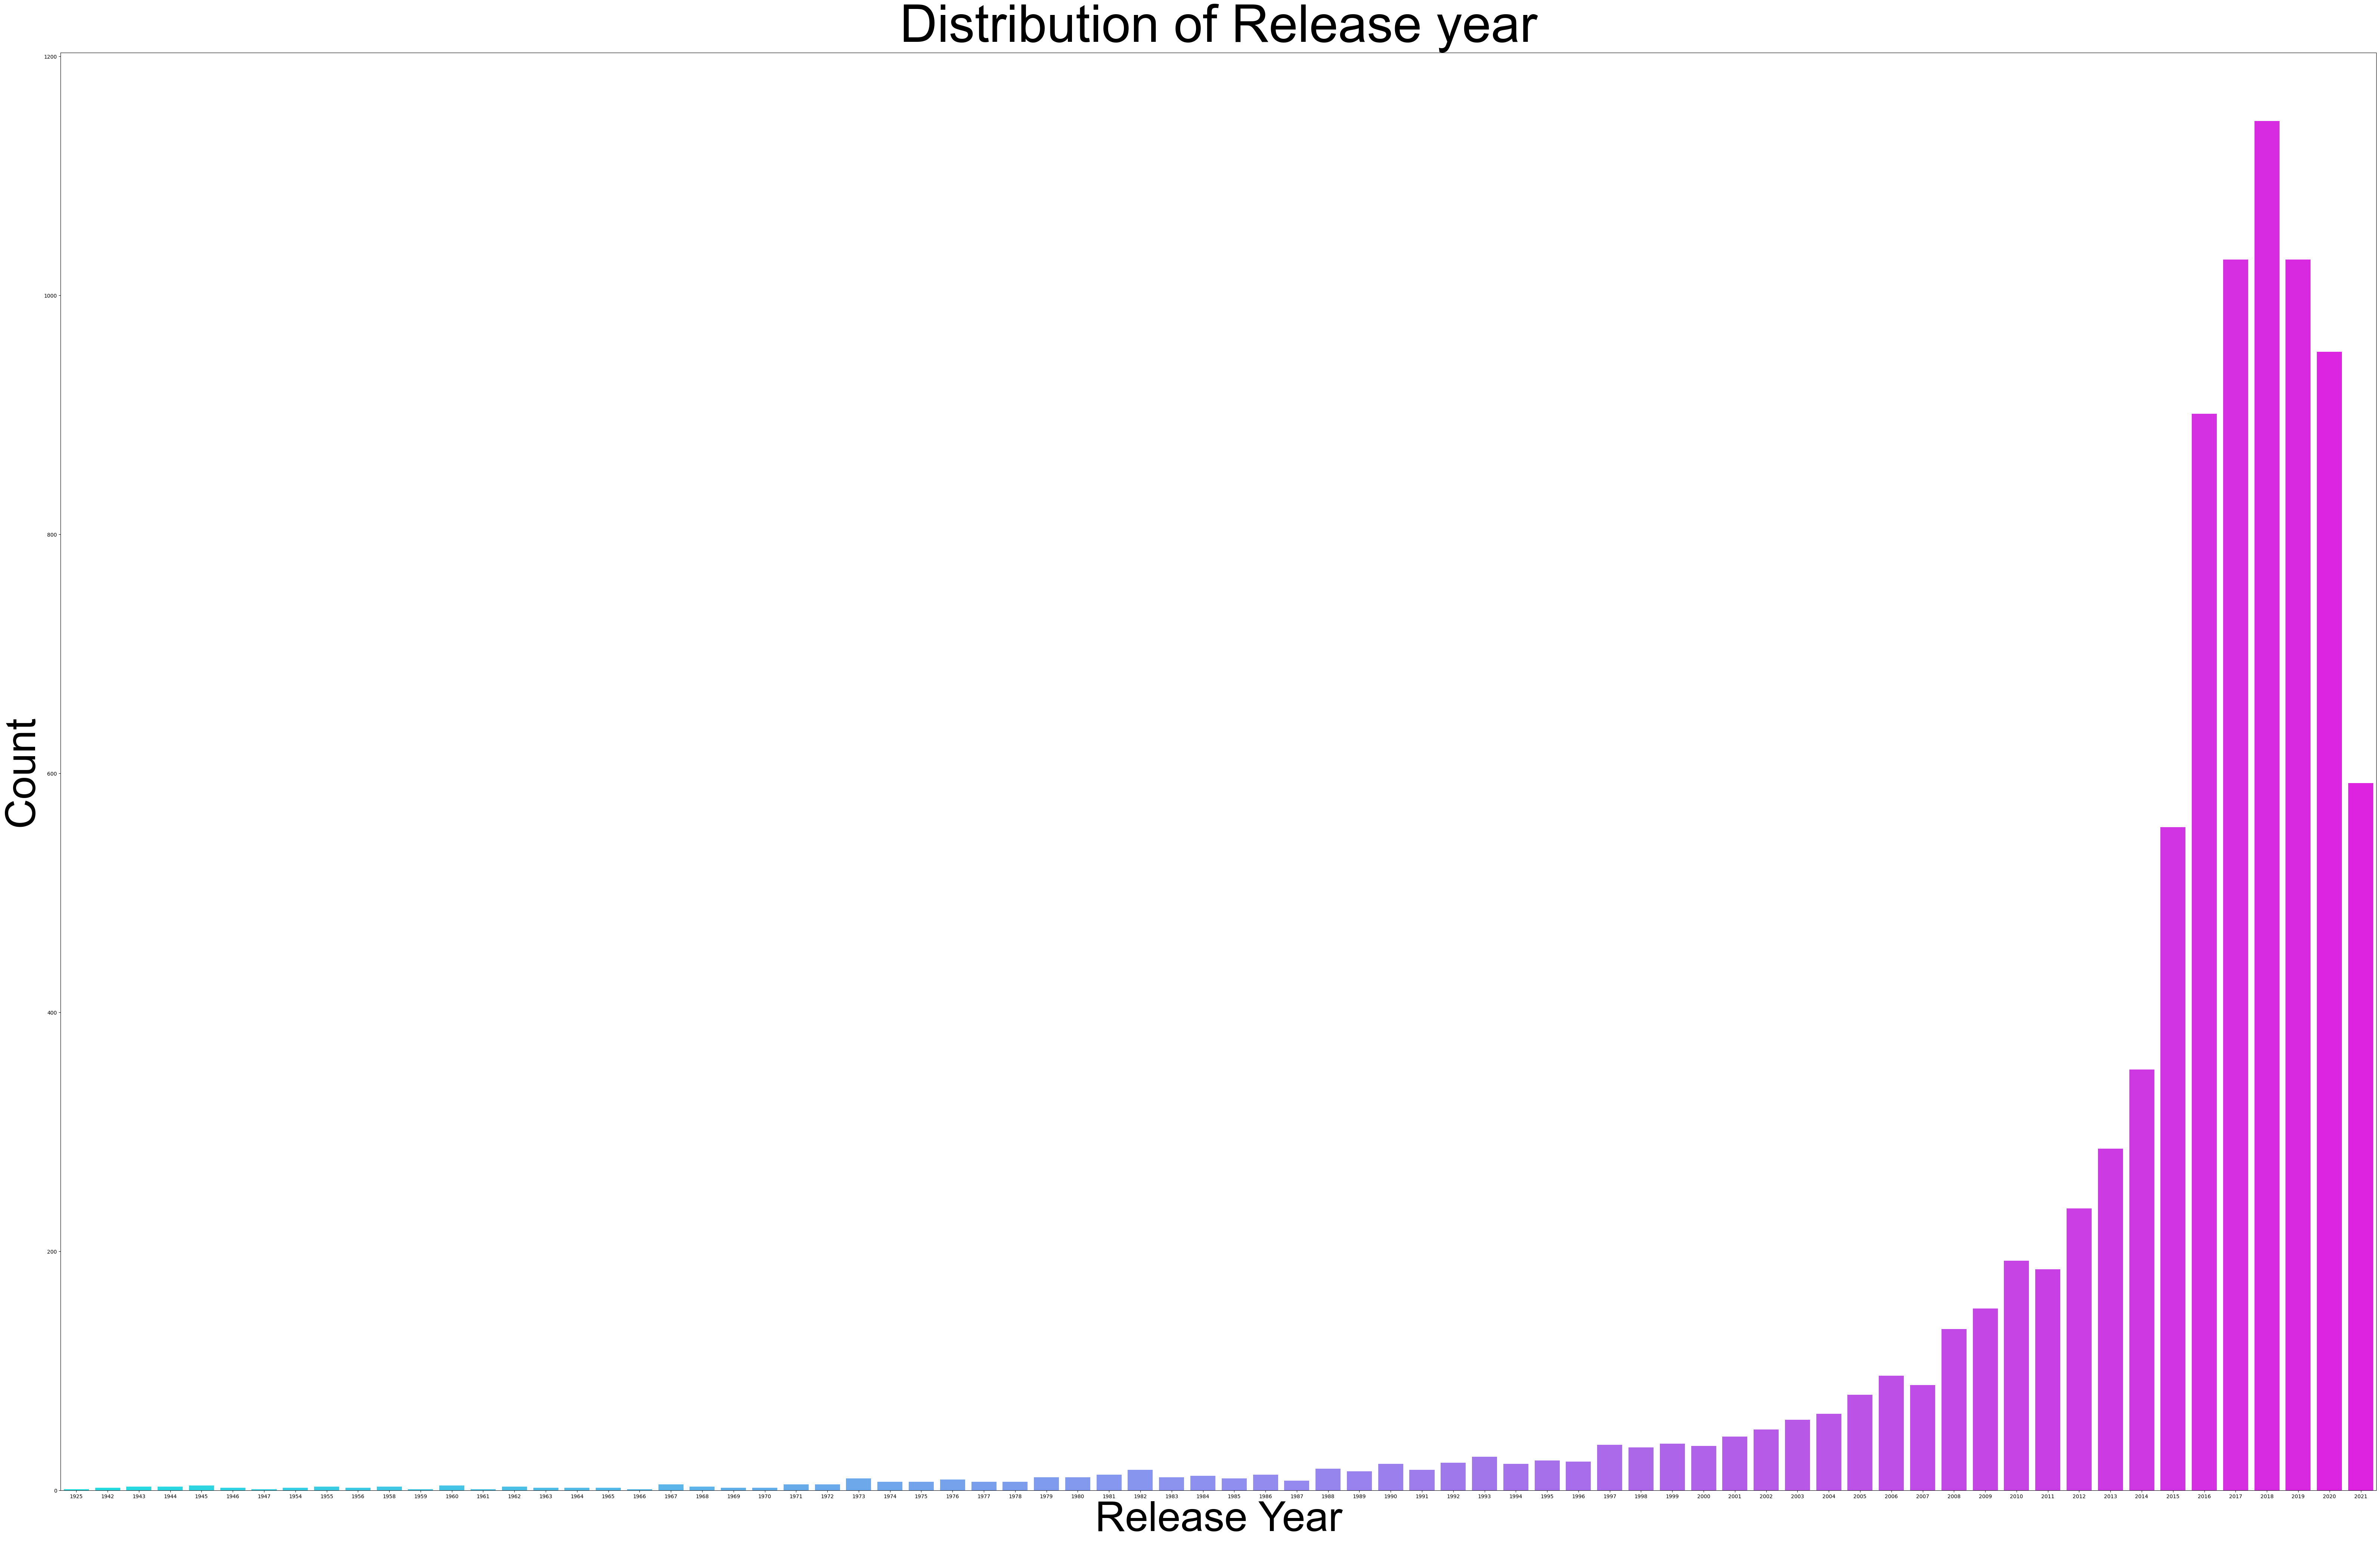

In [14]:
# Distribution of Release Year (Count Plot)
plt.figure(figsize=(80,50))
sns.countplot(x='release_year',data=df,palette='cool')
plt.title("Distribution of Release year",fontdict={'fontname':"arial",'fontsize':100})
plt.xlabel('Release Year',fontdict={'fontname':'arial','fontsize':80})
plt.ylabel('Count',fontdict={'fontname':'arial','fontsize':80})
plt.show()

C:\Users\Yash\AppData\Local\Temp\ipykernel_64644\2539361513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type',data=df,palette='magma')


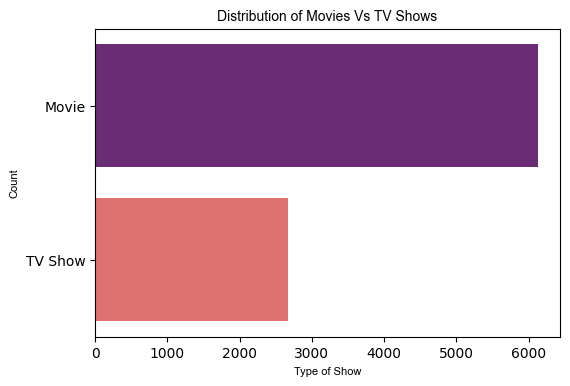

In [15]:
# Count of Movie vs TV Shows (Bar Chart)

plt.figure(figsize=(6,4))
sns.countplot(y='type',data=df,palette='magma')
plt.title("Distribution of Movies Vs TV Shows",fontdict={'fontname':"arial",'fontsize':10})
plt.xlabel('Type of Show',fontdict={'fontname':'arial','fontsize':8})
plt.ylabel('Count',fontdict={'fontname':'arial','fontsize':8})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

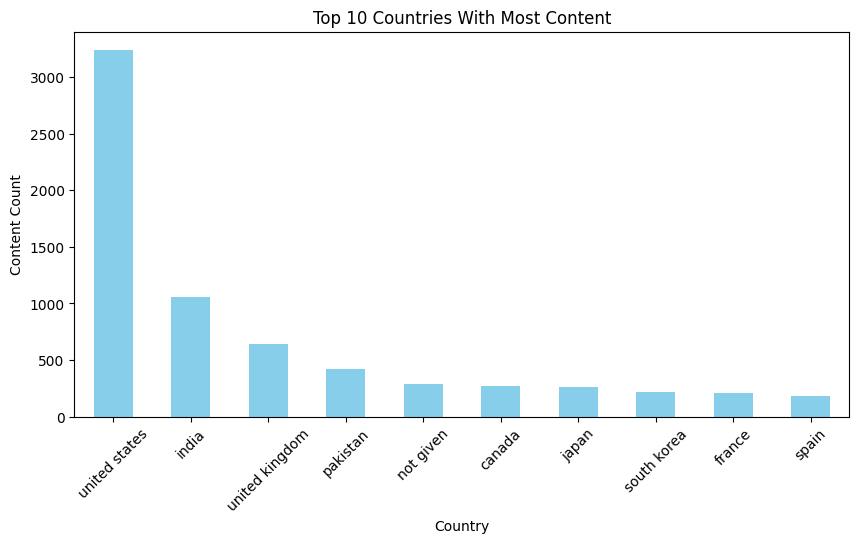

In [16]:
# Top 10 Countries Producing Netflix Content (Bar Chart)

plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar',color='skyblue')
plt.title("Top 10 Countries With Most Content")
plt.xlabel("Country")
plt.ylabel("Content Count")
plt.xticks(rotation=45)
plt.show

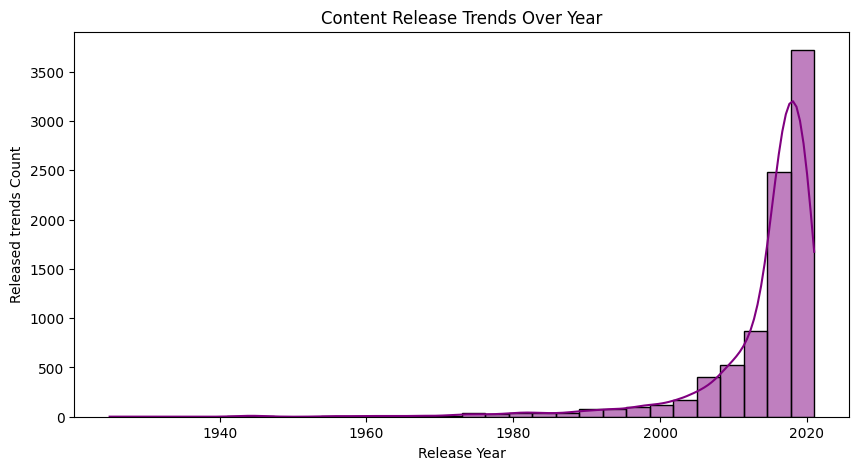

In [17]:
# Distribution of Content Release Years
# Histogram with KDE (Kernel Density Estimate) 

plt.figure(figsize=(10,5))
sns.histplot(df['release_year'],bins=30,kde=True,color='purple')
plt.title("Content Release Trends Over Year")
plt.xlabel("Release Year")
plt.ylabel("Released trends Count")
plt.show()

C:\Users\Yash\AppData\Local\Temp\ipykernel_64644\3548406206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating',data=df,order=df["rating"].value_counts().index,palette="viridis")


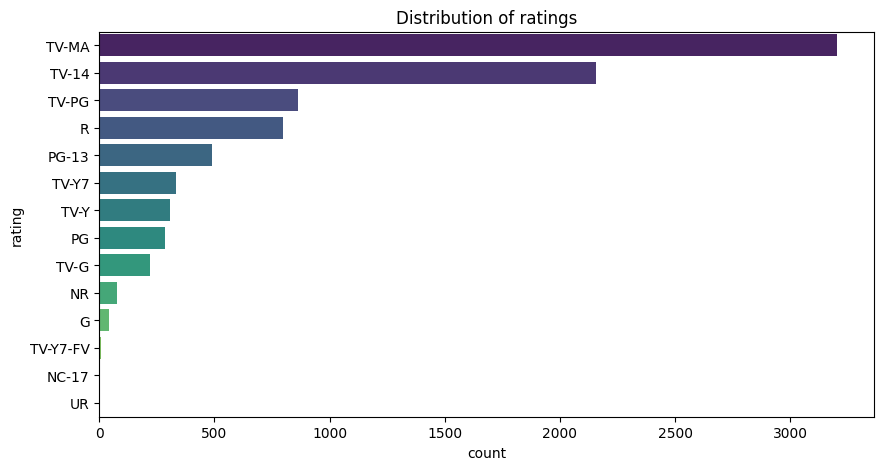

In [18]:
# Distribution of Ratings (Count Plot)

plt.figure(figsize=(10,5))
sns.countplot(y='rating',data=df,order=df["rating"].value_counts().index,palette="viridis")
plt.title('Distribution of ratings')
plt.show()

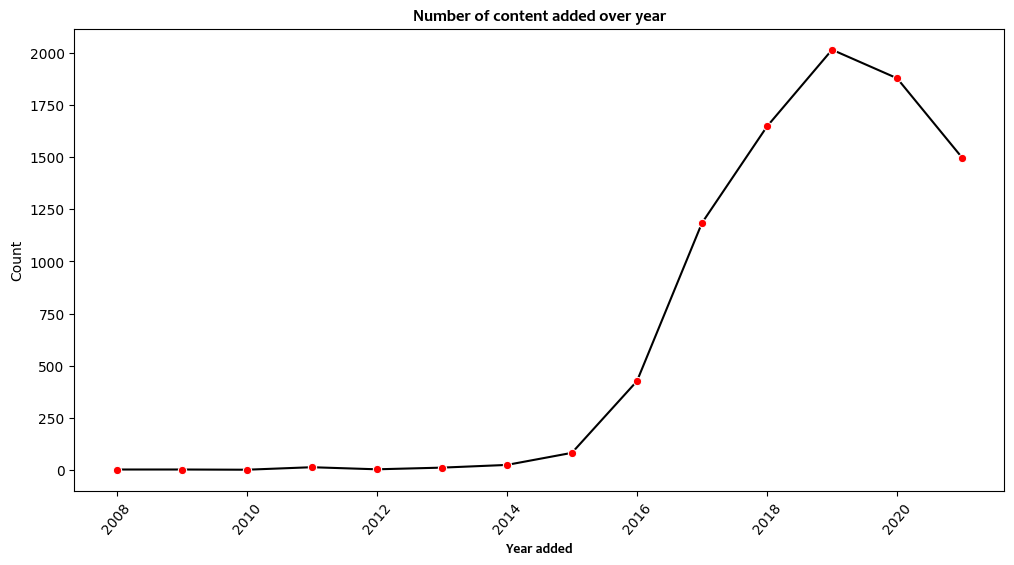

In [19]:
# Content Added Over the Years
# Time Series Line Plot

df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(12,6))
sns.lineplot(
    x=df['year_added'].value_counts().sort_index().index,
    y=df['year_added'].value_counts().sort_index().values,
    marker="o",color='black',markerfacecolor='red')
plt.title('Number of content added over year',fontdict={'fontname':'candara','fontweight':'bold'})
plt.xlabel('Year added',fontdict={'fontname':'candara','fontweight':'bold'})
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

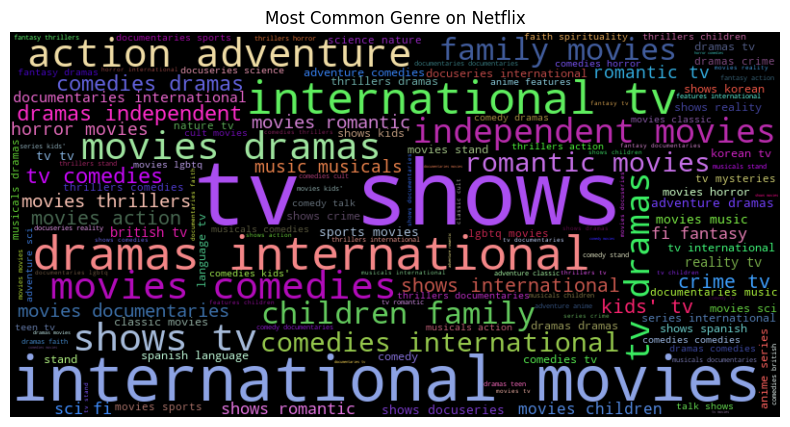

In [20]:
# Genre Distribution
# Word Cloud for Visualizing Genres

def custom_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"rgb({random.randint(50,255)},{random.randint(0,255)},{random.randint(50,255)})"
text = ' '.join(df['listed_in'].dropna())

wordcloud = WordCloud(width=800,height=400,background_color='black',color_func=custom_color).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Genre on Netflix")
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Yash\AppData\Local\Temp\ipykernel_64644\4129490450.py:3: SyntaxWarning: invalid escape sequence '\d'
  df['duration']=df['duration'].astype(str).str.extract('(\d+)').astype(float)


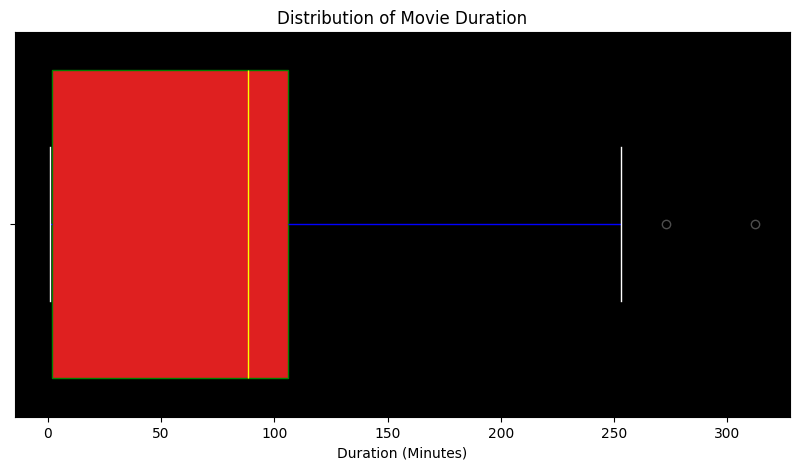

In [21]:
# Duration Distribution of Movies (Box Plot)

df['duration']=df['duration'].astype(str).str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,5),facecolor='white')

ax = sns.boxplot(x=df['duration'],
                 color='red',
                 boxprops={'edgecolor':'green'},
                 whiskerprops={'color':'blue'},
                 capprops={'color':'white'},
                 medianprops={'color':'yellow'},
                 flierprops={'marker':'o','color':'pink','markersize':6
                             }
                 )
ax.set_facecolor('black')

plt.title("Distribution of Movie Duration")
plt.xlabel('Duration (Minutes)')
plt.show()

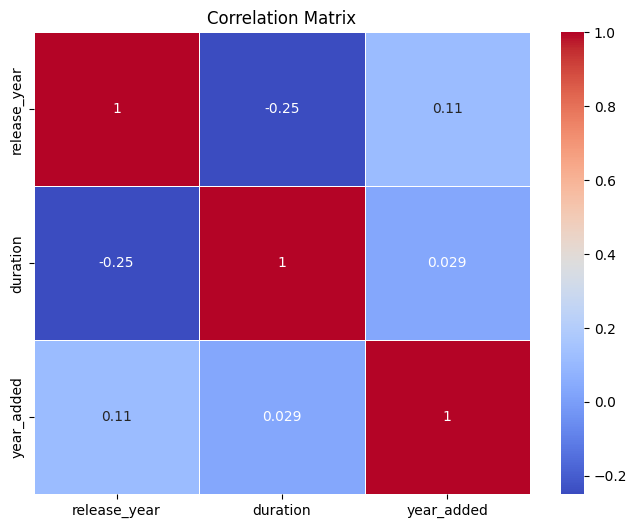

In [22]:
# Heatmap for Correlation Analysis
# Finding Relationships Between Numeric Columns

plt.figure(figsize=(8,6))

sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
dt={
    'rating':1,
    'release_year':0
}
df['country']=df['country'].map(dt)
df['country'].unique()

array([nan])

## Data Visualization End ---
---

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x_train,y_train,x_test,y_test = train_test_split()